In [1]:
import pandahouse as ph
import pandas as pd
import numpy as np

In [2]:
connection = {'database':'default',
             'host': 'https://clickhouse.lab.karpov.courses',
             'user':'student',
             'password':'dpo_python_2020'}

In [3]:
query="""SELECT count(*)
FROM ldn_listings"""

In [4]:
ph.read_clickhouse(query, connection=connection)

,count()
0,85207


In [5]:
query2="""SELECT
id,
room_type,
replaceRegexpAll(price, '[$,]', '' ) AS price
FROM ldn_listings
LIMIT 1000"""

In [6]:
df=ph.read_clickhouse(query2,connection=connection)

In [7]:
df.price=df.price.astype(float)

In [8]:
df.dtypes

id            uint32
room_type     object
price        float64
dtype: object

In [25]:
df.groupby('room_type')['price'].quantile(q=0.75)

room_type
Entire home/apt    160.00
Hotel room         157.00
Private room        70.00
Shared room         69.25
Name: price, dtype: float64

In [37]:
query3="""SELECT 
room_type,
AVG(toFloat32OrNull(replaceRegexpAll(price, '[$,]', '' ))) AS price,
AVG(toFloat32OrNull(review_scores_rating)) AS score
FROM ldn_listings
GROUP BY room_type
LIMIT 1000
"""

In [38]:
df3=ph.read_clickhouse(query3, connection=connection)

In [39]:
import seaborn as sns

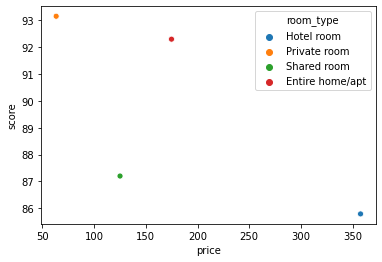

In [40]:
sns.scatterplot(x='price', y='score', data=df3, hue='room_type')